## REGRESION LINEAL

In [29]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 


In [49]:
df = pd.DataFrame(
    { 
    'Survived': [0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], 
    'Pclass': [3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 2, 1, 1, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 1, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 2, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 2, 2],  
    'Sex': ['male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'female', 'male', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'male', 'female', 'female', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female', 'male', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male'], 
    'Age': [29.0, 38.0, 26.0, 35.0, 35.0, 20.0, 54.0, 2.0, 27.0, 14.0, 4.0, 58.0, 20.0, 39.0, 14.0, 55.0, 2.0, 21.0, 31.0, 22.0, 35.0, 34.0, 15.0, 28.0, 8.0, 38.0, 23.0, 19.0, 24.0, 25.0, 40.0, 26.0, 27.0, 66.0, 28.0, 42.0, 28.0, 21.0, 18.0, 14.0, 40.0, 27.0, 29.0, 3.0, 19.0, 30.0, 31.0, 32.0, 33.0, 18.0, 7.0, 21.0, 49.0, 29.0, 65.0, 34.0, 21.0, 28.5, 5.0, 11.0, 22.0, 38.0, 45.0, 4.0, 35.0, 36.0, 29.0, 19.0, 17.0, 26.0, 32.0, 16.0, 21.0, 26.0, 32.0, 25.0, 37.0, 38.0, 0.83, 30.0, 22.0, 29.0, 39.0, 28.0, 17.0, 33.0, 16.0, 40.0, 23.0, 24.0, 29.0, 20.0, 46.0, 26.0, 59.0, 20.0, 71.0, 23.0, 34.0, 34.0], 
    'SibSp': [1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 1, 4, 0, 1, 1, 0, 0, 0, 0, 1, 5, 0, 0, 1, 3, 0, 1, 0, 0, 4, 2, 0, 5, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1], 
    'Parch': [0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0], 
 'Fare': [7.25, 71.2833, 7925.0, 53.1, 8.05, 8.4583, 51.8625, 21075.0, 11.1333, 30.0708, 16.7, 26.55, 8.05, 31275.0, 7.8542, 16.0, 29125.0, 13.0, 18.0, 7225.0, 26.0, 13.0, 8.0292, 35.5, 21075.0, 31.3875, 7225.0, 263.0, 7.8792, 7.8958, 27.7208, 146.5208, 7.75, 10.5, 82.1708, 52.0, 7.2292, 8.05, 18.0, 11.2417, 9475.0, 21.0, 7.8958, 41.5792, 7.8792, 8.05, 15.5, 7.75, 21.6792, 17.8, 39.6875, 7.8, 76.7292, 26.0, 61.9792, 35.5, 10.5, 7.2292, 27.75, 46.9, 7.2292, 80.0, 83475.0, 27.9, 27.7208, 15.2458, 10.5, 8.1583, 7925.0, 8.6625, 10.5, 46.9, 73.5, 14.4542, 56.4958, 7.65, 7.8958, 8.05, 29.0, 12475.0, 9.0, 9.5, 7.7875, 47.1, 10.5, 15.85, 34375.0, 8.05, 263.0, 8.05, 8.05, 7.8542, 61175.0, 20575.0, 7.25, 8.05, 34.6542, 63.3583, 23.0, 26.0],  
    'Embarked':[2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 
 0, 2, 2, 0, 2, 2, 0, 0, 1, 2, 1, 1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 
 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2]
                 })
 


   Survived  Pclass     Sex   Age  SibSp  Parch       Fare  Embarked
0         0       3    male  29.0      1      0     7.2500         2
1         1       1  female  38.0      1      0    71.2833         0
2         1       3  female  26.0      0      0  7925.0000         2
3         1       1  female  35.0      1      0    53.1000         2
4         0       3    male  35.0      0      0     8.0500         2

Información general sobre el DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  100 non-null    int64  
 1   Pclass    100 non-null    int64  
 2   Sex       100 non-null    object 
 3   Age       100 non-null    float64
 4   SibSp     100 non-null    int64  
 5   Parch     100 non-null    int64  
 6   Fare      100 non-null    float64
 7   Embarked  100 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage

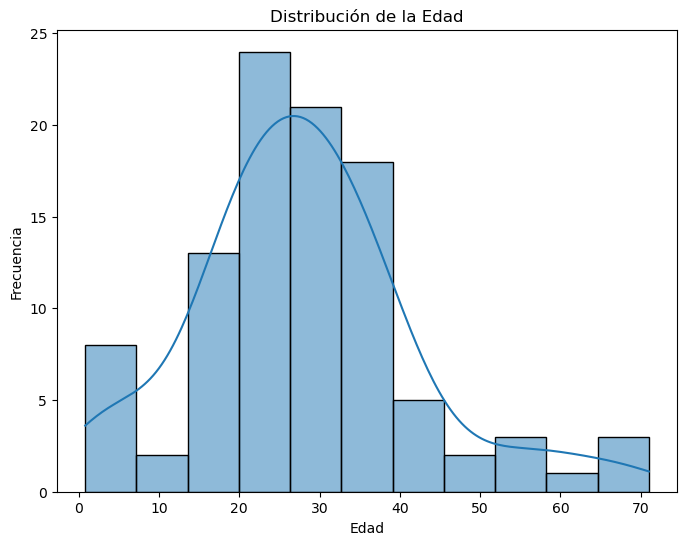

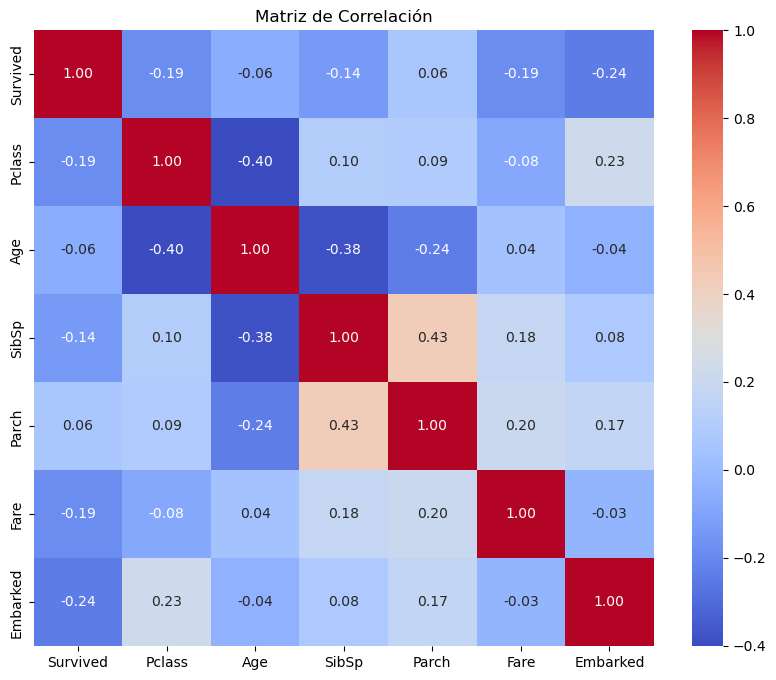

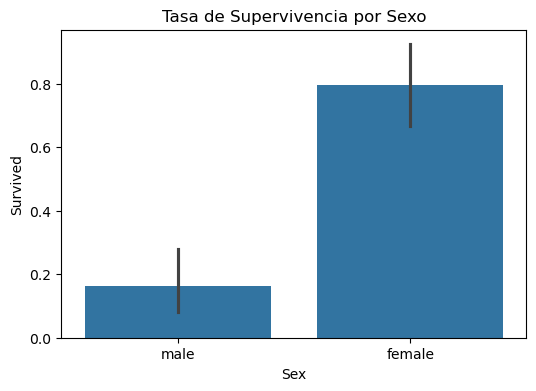

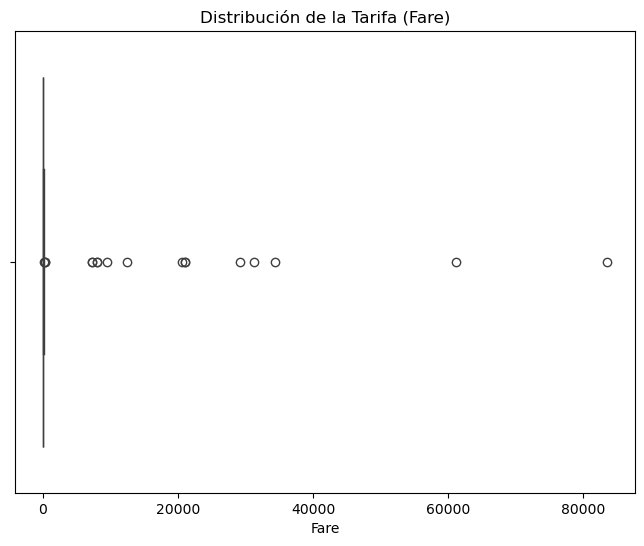

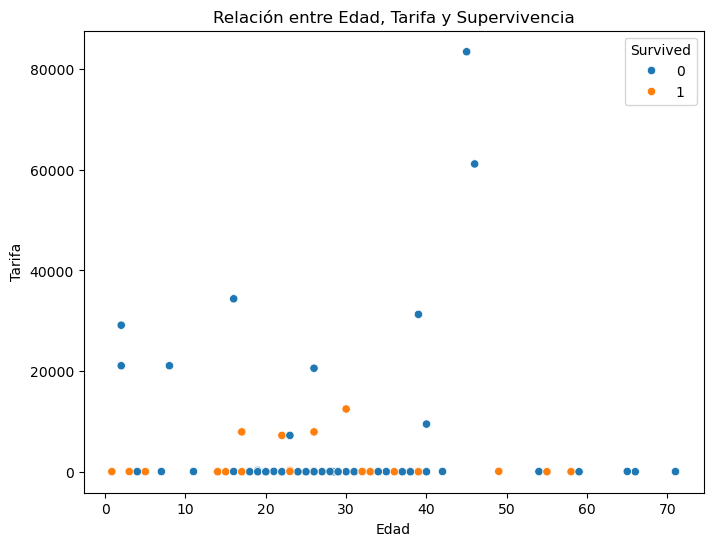

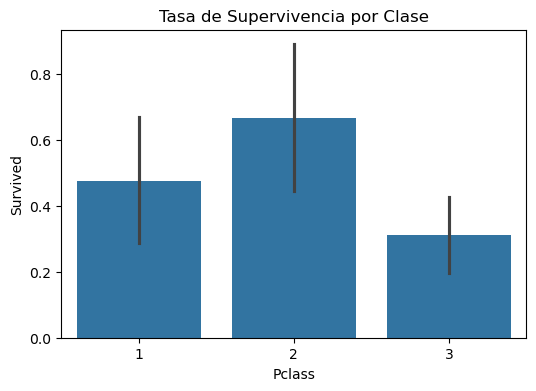

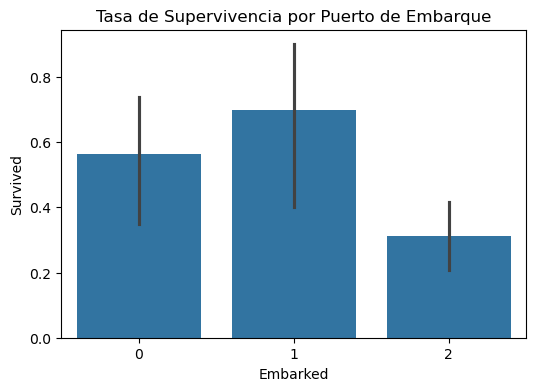

In [51]:
# Paso 1: Exploración básica de los datos
print(df.head())  # Mostrar las primeras filas del DataFrame
# 2. Obtener información general sobre el DataFrame
print("\nInformación general sobre el DataFrame:")
print(df.info())
# 3. Resumen estadístico de las variables numéricas
print("\nResumen estadístico:")
print(df.describe())
# 4. Comprobar si hay valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())
# 5. Visualizar la distribución de la variable 'Age' (edad)
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()
# 6. Visualizar la matriz de correlación
# Filtrar solo las columnas numéricas para la matriz de correlación
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
corr_matrix = numeric_df.corr()  # Aquí usamos numeric_df en lugar de df
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()
# 7. Visualizar la tasa de supervivencia por sexo
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Tasa de Supervivencia por Sexo')
plt.show()
# 8. Boxplot para detectar valores atípicos en la columna 'Fare'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Fare'])
plt.title('Distribución de la Tarifa (Fare)')
plt.show()
# 9. Relación entre 'Age' y 'Fare' con respecto a 'Survived'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Relación entre Edad, Tarifa y Supervivencia')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.show()
# 10. Ver las relaciones entre variables categóricas y la variable objetivo 'Survived'
# Relación entre 'Pclass' y 'Survived'
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Tasa de Supervivencia por Clase')
plt.show()
# Relación entre 'Embarked' y 'Survived'
plt.figure(figsize=(6, 4))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Tasa de Supervivencia por Puerto de Embarque')
plt.show()


In [53]:
# Codificar 'Sex' (Masculino/Femenino) con LabelEncoder
label_encoder_sex = LabelEncoder()
df['Sex'] = label_encoder_sex.fit_transform(df['Sex'])
 

 
# 5. Separar variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns=['Survived'])
y = df['Survived']

# 6. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Escalado de características numéricas
scaler = StandardScaler()
X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = scaler.transform(X_test[['Age', 'Fare']])

# Mostrar las primeras filas después del preprocesamiento
print(df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch       Fare  Embarked
0         0       3    1  29.0      1      0     7.2500         2
1         1       1    0  38.0      1      0    71.2833         0
2         1       3    0  26.0      0      0  7925.0000         2
3         1       1    0  35.0      1      0    53.1000         2
4         0       3    1  35.0      0      0     8.0500         2


In [55]:
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de y_train: {y_train.shape}")


Forma de X_train: (80, 7)
Forma de y_train: (80,)


In [57]:
# Imputar la columna 'Age' con la mediana
imputer_age = SimpleImputer(strategy='median')
df['Age'] = imputer_age.fit_transform(df[['Age']])
 

# 8. Crear y entrenar el modelo RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
accuracy = model.score(X_test, y_test)
print(f"Precisión en los datos de prueba: {accuracy:.4f}")

# Verifica las formas de los conjuntos de datos
print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")


Precisión en los datos de prueba: 0.8000
Conjunto de entrenamiento: (80, 7)
Conjunto de prueba: (20, 7)
